- <b>Classification algorithms</b>

- <b>Submitted by Kaushik </b>
- <b>email- kumarkaushik1580@gmail.com</b>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv("Dataset_II.csv")
ds1 = pd.read_csv("Dataset_II.csv")

In [3]:
ds.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# Data preprocessing

In [4]:
ds.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [5]:
ds.drop(["Unnamed: 0"],axis=1,inplace=True)
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [6]:
ds_null=ds.columns[ds.isnull().any()]
ds[ds_null].isnull().sum()

Saving accounts     183
Checking account    394
dtype: int64

ds["Saving accounts"].fillna(ds["Saving accounts"].mean(), inplace=True)
ds["Checking account"].fillna(ds["Checking account"].mean(), inplace=True)

In [7]:
ds["Saving accounts"].fillna(method='bfill',inplace=True)
ds["Checking account"].fillna(method='ffill',inplace=True)

In [8]:
ds.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [9]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,moderate,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [10]:
ds.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [11]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ds_categ:
    print(ds[i].unique())
    ds[i] = le.fit_transform(ds[i])

['male' 'female']
['own' 'free' 'rent']
['little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [13]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,1,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


ds_copy = ds.copy()

ds_copy.head()

# Feature Engineering
## Outlier Detection and treatment

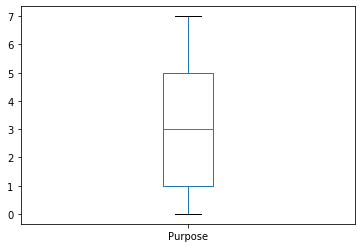

In [14]:
ds['Purpose'].plot.box()

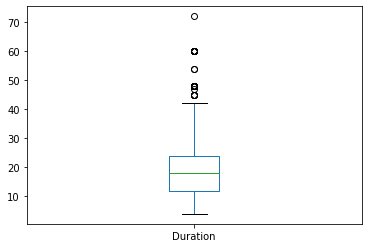

In [15]:
ds['Duration'].plot.box()

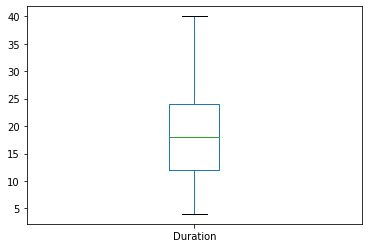

In [16]:
ds.loc[ds['Duration']>41,'Duration']=np.mean(ds['Duration'])
ds['Duration'].plot.box()

In [17]:
ds.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

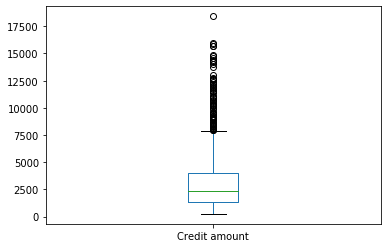

In [18]:
ds['Credit amount'].plot.box()

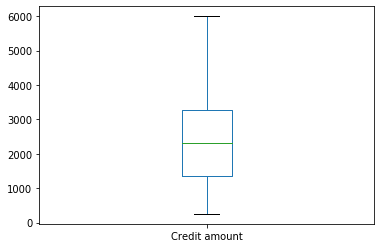

In [19]:
ds.loc[ds['Credit amount']>6000,'Credit amount']=np.mean(ds['Credit amount'])
ds['Credit amount'].plot.box()

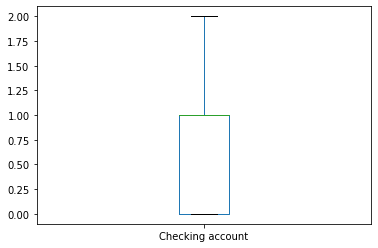

In [20]:
ds['Checking account'].plot.box()

ds.loc[ds['area_mean']>900,'area_mean']=np.mean(ds['area_mean'])
ds['area_mean'].plot.box()

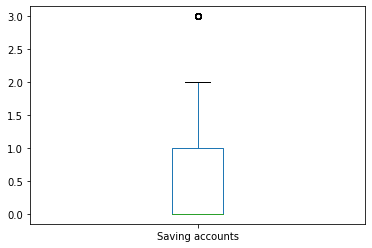

In [21]:
ds['Saving accounts'].plot.box()

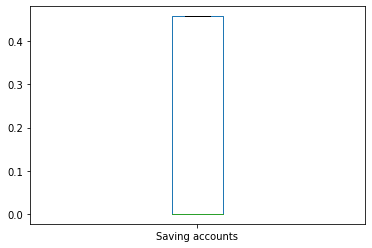

In [22]:
ds.loc[ds['Saving accounts']>0.45,'Saving accounts']=np.mean(ds['Saving accounts'])
ds['Saving accounts'].plot.box()

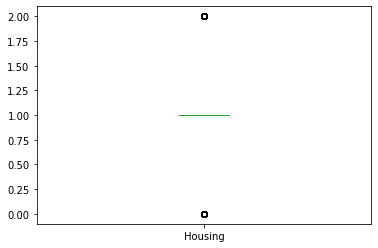

In [23]:
ds['Housing'].plot.box()

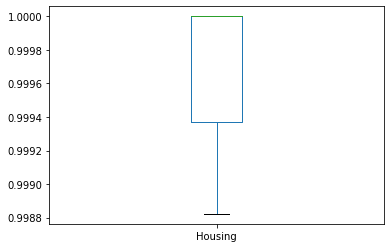

In [26]:
ds.loc[ds['Housing']>1.002,'Housing']=np.mean(ds['Housing'])
ds.loc[ds['Housing']<0.992,'Housing']=np.mean(ds['Housing'])
ds['Housing'].plot.box()

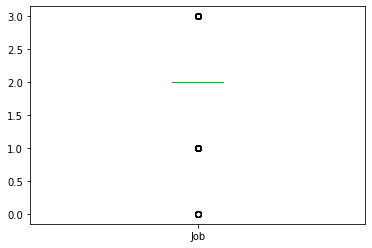

In [27]:
ds['Job'].plot.box()

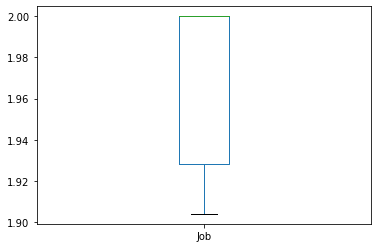

In [30]:
ds.loc[ds['Job']>2.0,'Job']=np.mean(ds['Job'])
ds.loc[ds['Job']<1.75,'Job']=np.mean(ds['Job'])
ds['Job'].plot.box()

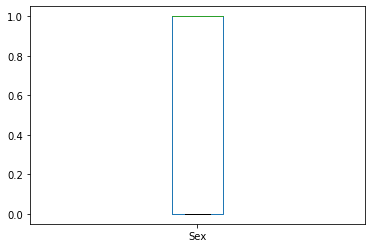

In [31]:
ds['Sex'].plot.box()

ds.loc[ds['concave points_mean']>0.160,'concave points_mean']=np.mean(ds['concave points_mean'])
ds['concave points_mean'].plot.box()

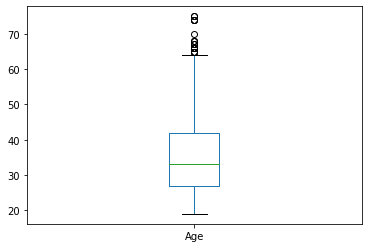

In [32]:
ds['Age'].plot.box()

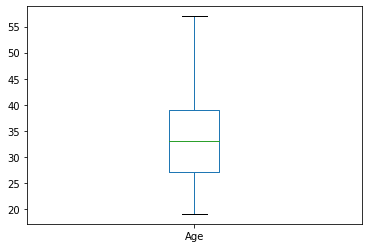

In [33]:
ds.loc[ds['Age']>57,'Age']=np.mean(ds['Age'])
#ds.loc[ds['symmetry_mean']<0.12,'symmetry_mean']=np.mean(ds['symmetry_mean'])

ds['Age'].plot.box()

In [34]:
ds.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.865214,0.690000,1.969912,0.999760,0.119538,0.637000,2438.589442,18.598143,2.878000
std,8.799675,0.462725,0.039952,0.000405,0.201245,0.640032,1248.518270,8.463538,1.978138
min,19.000000,0.000000,1.904000,0.998822,0.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,0.000000,1.928470,0.999368,0.000000,0.000000,1365.500000,12.000000,1.000000
50%,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2319.500000,18.000000,3.000000
75%,39.000000,1.000000,2.000000,1.000000,0.458000,1.000000,3271.258000,24.000000,5.000000
max,57.000000,1.000000,2.000000,1.000000,0.458000,2.000000,5998.000000,40.000000,7.000000


In [35]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.0,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.0,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.0,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.0,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.0,0,4870.000,24.000,1


In [36]:
ds.shape

(1000, 9)

In [37]:
ds_1 = ds.copy()

In [38]:
ds_1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.0,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.0,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.0,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.0,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.0,0,4870.000,24.000,1


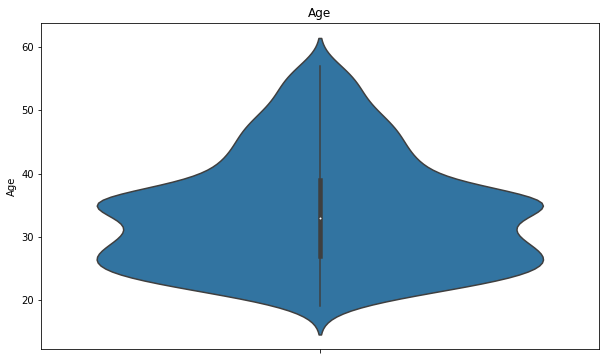

In [39]:
plt.figure(figsize=(10,6))
plt.title("Age")
sns.axes_style("dark")
sns.violinplot(y=ds["Age"])
plt.show()

In [40]:
ds.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

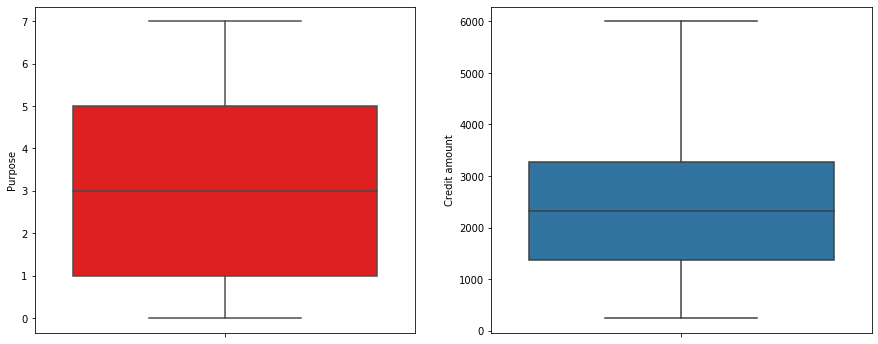

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=ds["Purpose"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=ds["Credit amount"])
plt.show()

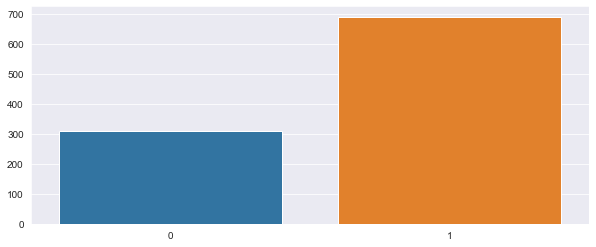

In [42]:
genders = ds.Sex.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [43]:
X = ds[["Purpose","Credit amount"]]
Y = ds[["Purpose","Checking account"]]
Z = ds[["Purpose","Saving accounts"]]
A = ds[["Purpose","Housing"]]
B = ds[["Purpose","Job"]]

## K_Means cluster
## K=3

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=3)

In [46]:
kmeans.fit(ds)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
pred=kmeans.predict(ds)

In [48]:
pred

array([2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2,
       0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2,
       2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2,

In [49]:
pd.Series(pred).value_counts()

2    473
0    415
1    112
dtype: int64

In [50]:
kmeans.inertia_

220477605.97162747

In [51]:
kmeans.score(ds)

-220477605.97162724

In [52]:
K=3

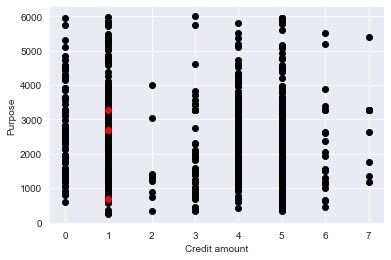

In [53]:
Centroids = (X.sample(n=K))
plt.scatter(X["Purpose"],X["Credit amount"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Credit amount"],c='red')
plt.xlabel('Credit amount')
plt.ylabel('Purpose')
plt.show()

In [54]:
diff = 1
j=0

In [55]:
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Credit amount"]-row_d["Credit amount"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Purpose","Credit amount"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Credit amount'] - Centroids['Credit amount']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Purpose","Credit amount"]]

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


28.172473645470085
27.215280154290824
8.500739399463995
0.0


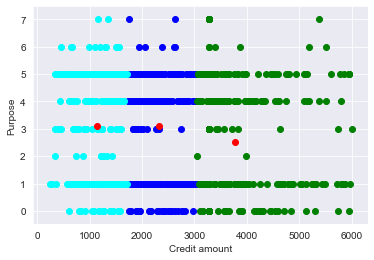

In [56]:
color=['blue','green','cyan']
for k in range(K):
    ds=X[X["Cluster"]==k+1]
    plt.scatter(ds["Credit amount"],ds["Purpose"],c=color[k])
plt.scatter(Centroids["Credit amount"],Centroids["Purpose"],c='red')
plt.xlabel('Credit amount')
plt.ylabel('Purpose')
plt.show()

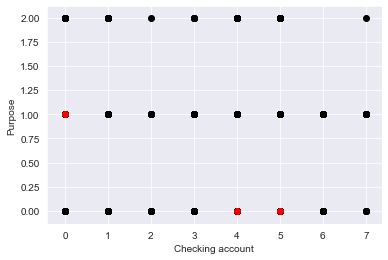

In [57]:
Centroids = (Y.sample(n=K))
plt.scatter(Y["Purpose"],Y["Checking account"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Checking account"],c='red')
plt.xlabel('Checking account')
plt.ylabel('Purpose')
plt.show()

In [58]:
diff = 1
j=0

In [59]:
while(diff!=0):
    XD=Y
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Checking account"]-row_d["Checking account"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        Y[i]=ED
        i=i+1

    C=[]
    for index,row in Y.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    Y["Cluster"]=C
    Centroids_new = Y.groupby(["Cluster"]).mean()[["Purpose","Checking account"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Checking account'] - Centroids['Checking account']).sum()
        print(diff.sum())
    Centroids = Y.groupby(["Cluster"]).mean()[["Purpose","Checking account"]]

0.06384288858176002
0.0


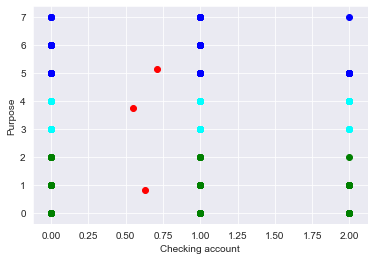

In [60]:
color=['blue','green','cyan']
for k in range(K):
    ds=Y[Y["Cluster"]==k+1]
    plt.scatter(ds["Checking account"],ds["Purpose"],c=color[k])
plt.scatter(Centroids["Checking account"],Centroids["Purpose"],c='red')
plt.xlabel('Checking account')
plt.ylabel('Purpose')
plt.show()

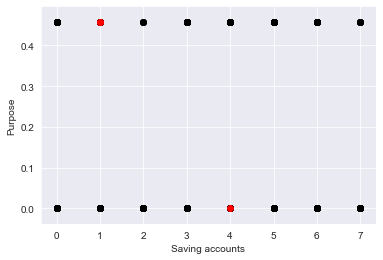

In [61]:
Centroids = (Z.sample(n=K))
plt.scatter(Z["Purpose"],Z["Saving accounts"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Saving accounts"],c='red')
plt.xlabel('Saving accounts')
plt.ylabel('Purpose')
plt.show()

In [62]:
diff = 1
j=0

In [63]:
while(diff!=0):
    XD=Z
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Saving accounts"]-row_d["Saving accounts"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        Z[i]=ED
        i=i+1

    C=[]
    for index,row in Z.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    Z["Cluster"]=C
    Centroids_new = Z.groupby(["Cluster"]).mean()[["Purpose","Saving accounts"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Saving accounts'] - Centroids['Saving accounts']).sum()
        print(diff.sum())
    Centroids = Z.groupby(["Cluster"]).mean()[["Purpose","Saving accounts"]]

-0.18154283691290973
0.0


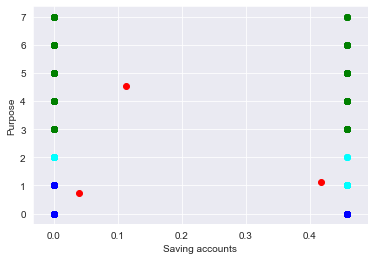

In [64]:
color=['blue','green','cyan']
for k in range(K):
    ds=Z[Z["Cluster"]==k+1]
    plt.scatter(ds["Saving accounts"],ds["Purpose"],c=color[k])
plt.scatter(Centroids["Saving accounts"],Centroids["Purpose"],c='red')
plt.xlabel('Saving accounts')
plt.ylabel('Purpose')
plt.show()

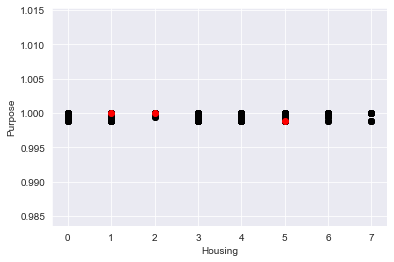

In [65]:
Centroids = (A.sample(n=K))
plt.scatter(A["Purpose"],A["Housing"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Housing"],c='red')
plt.xlabel('Housing')
plt.ylabel('Purpose')
plt.show()

In [66]:
diff = 1
j=0

In [67]:
while(diff!=0):
    XD=A
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Housing"]-row_d["Housing"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        A[i]=ED
        i=i+1

    C=[]
    for index,row in A.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    A["Cluster"]=C
    Centroids_new = A.groupby(["Cluster"]).mean()[["Purpose","Housing"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Housing'] - Centroids['Housing']).sum()
        print(diff.sum())
    Centroids = A.groupby(["Cluster"]).mean()[["Purpose","Housing"]]

0.0


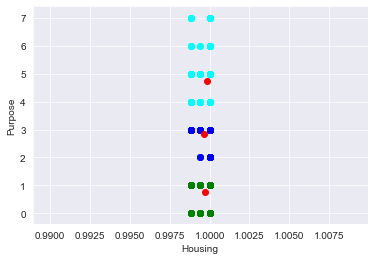

In [68]:
color=['blue','green','cyan']
for k in range(K):
    ds=A[A["Cluster"]==k+1]
    plt.scatter(ds["Housing"],ds["Purpose"],c=color[k])
plt.scatter(Centroids["Housing"],Centroids["Purpose"],c='red')
plt.xlabel('Housing')
plt.ylabel('Purpose')
plt.show()

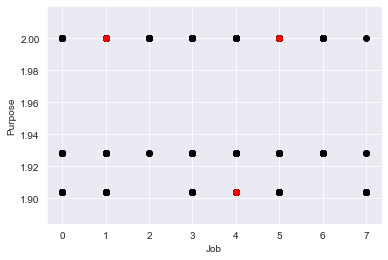

In [69]:
Centroids = (B.sample(n=K))
plt.scatter(B["Purpose"],B["Job"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Job"],c='red')
plt.xlabel('Job')
plt.ylabel('Purpose')
plt.show()

In [70]:
diff = 1
j=0

In [71]:
while(diff!=0):
    XD=B
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Job"]-row_d["Job"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        B[i]=ED
        i=i+1

    C=[]
    for index,row in B.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    B["Cluster"]=C
    Centroids_new = B.groupby(["Cluster"]).mean()[["Purpose","Job"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Job'] - Centroids['Job']).sum()
        print(diff.sum())
    Centroids = B.groupby(["Cluster"]).mean()[["Purpose","Job"]]

0.0


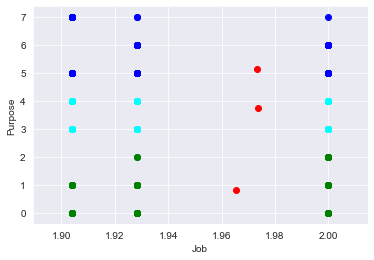

In [72]:
color=['blue','green','cyan']
for k in range(K):
    ds=B[B["Cluster"]==k+1]
    plt.scatter(ds["Job"],ds["Purpose"],c=color[k])
plt.scatter(Centroids["Job"],Centroids["Purpose"],c='red')
plt.xlabel('Job')
plt.ylabel('Purpose')
plt.show()

In [73]:
SSE = []

In [74]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(ds_1)
    SSE.append(kmeans.inertia_)

In [75]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

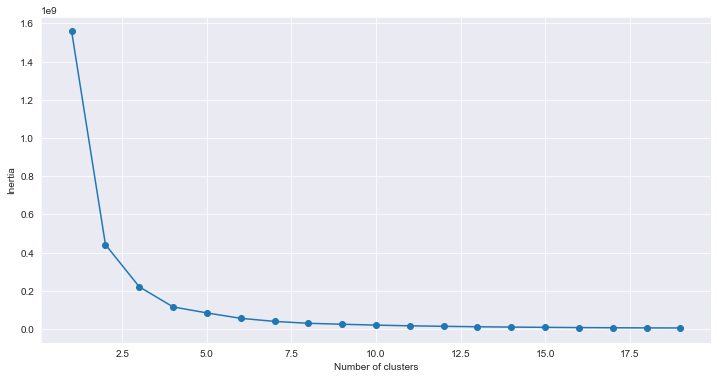

In [76]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(ds_1)

In [78]:
pd.DataFrame(ds_1).describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.865214,0.690000,1.969912,0.999760,0.119538,0.637000,2438.589442,18.598143,2.878000
std,8.799675,0.462725,0.039952,0.000405,0.201245,0.640032,1248.518270,8.463538,1.978138
min,19.000000,0.000000,1.904000,0.998822,0.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,0.000000,1.928470,0.999368,0.000000,0.000000,1365.500000,12.000000,1.000000
50%,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2319.500000,18.000000,3.000000
75%,39.000000,1.000000,2.000000,1.000000,0.458000,1.000000,3271.258000,24.000000,5.000000
max,57.000000,1.000000,2.000000,1.000000,0.458000,2.000000,5998.000000,40.000000,7.000000


In [79]:
SSE_scaled = []

In [80]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(ds_1)
    SSE_scaled.append(kmeans.inertia_)

## Elbow method to get total no. of clusters

Text(0, 0.5, 'SSE')

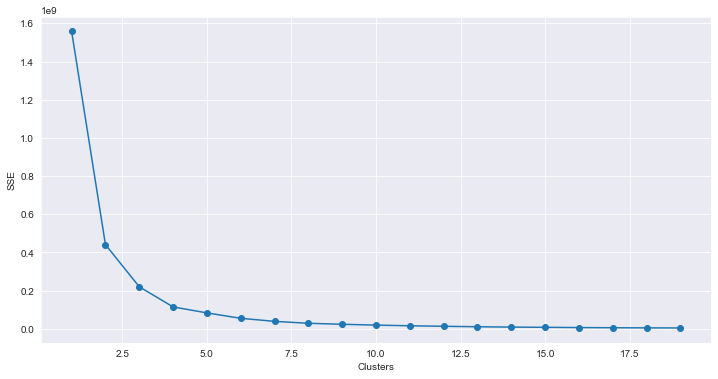

In [81]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

## K=5

In [82]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5)
kmeans.fit(ds_1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [83]:
pred = kmeans.predict(ds_1)

In [84]:
pred

array([4, 2, 0, 3, 2, 3, 0, 3, 3, 2, 4, 2, 4, 4, 4, 4, 0, 3, 3, 3, 0, 0,
       0, 4, 0, 4, 1, 1, 0, 3, 0, 3, 2, 4, 4, 2, 3, 0, 4, 1, 0, 4, 3, 3,
       3, 4, 0, 4, 3, 0, 0, 2, 4, 3, 0, 1, 3, 3, 0, 3, 4, 4, 0, 3, 3, 2,
       0, 1, 4, 0, 3, 1, 4, 2, 0, 4, 3, 2, 3, 3, 2, 4, 4, 4, 0, 4, 4, 3,
       0, 4, 1, 4, 1, 3, 4, 3, 0, 0, 0, 3, 4, 0, 1, 0, 0, 3, 3, 3, 3, 4,
       4, 1, 3, 3, 4, 3, 3, 0, 2, 0, 4, 3, 4, 1, 0, 0, 1, 1, 0, 3, 3, 3,
       0, 0, 3, 4, 3, 1, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 2, 4, 4, 0, 2, 3,
       3, 4, 4, 1, 3, 0, 3, 1, 4, 3, 1, 3, 4, 4, 3, 0, 1, 1, 0, 4, 3, 3,
       0, 1, 0, 1, 3, 2, 4, 3, 1, 4, 2, 4, 1, 3, 2, 3, 3, 0, 3, 4, 4, 1,
       0, 2, 1, 4, 2, 1, 4, 3, 0, 4, 3, 4, 3, 3, 2, 0, 3, 1, 3, 3, 3, 4,
       1, 4, 1, 3, 2, 0, 3, 3, 4, 3, 2, 0, 0, 1, 4, 4, 3, 0, 4, 0, 1, 4,
       2, 4, 3, 4, 1, 4, 0, 1, 1, 0, 0, 3, 0, 3, 0, 0, 3, 4, 4, 4, 2, 0,
       4, 1, 3, 4, 3, 1, 0, 4, 3, 3, 3, 0, 0, 4, 2, 0, 3, 4, 4, 4, 3, 3,
       2, 3, 4, 1, 1, 3, 3, 2, 3, 3, 2, 4, 0, 0, 1,

In [85]:
kmeans.inertia_

83655141.07796207

kmeans.cluster_centers_

In [86]:
frame = pd.DataFrame(ds_1)

In [87]:
frame

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.000,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.000,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.000,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.000,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.000,0,4870.000,24.000,1
...,...,...,...,...,...,...,...,...,...
995,31.000,0,1.92847,1.000000,0.000,0,1736.000,12.000,4
996,40.000,1,1.90400,1.000000,0.000,0,3857.000,30.000,1
997,38.000,1,2.00000,1.000000,0.000,0,804.000,12.000,5
998,23.000,1,2.00000,0.998822,0.000,0,1845.000,20.903,5


In [88]:
ds_1.shape

(1000, 9)

In [89]:
ds_1.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [91]:
K1=5

In [92]:
X1 = ds_1[["Purpose","Credit amount"]]
Y1 = ds_1[["Purpose","Checking account"]]
Z1 = ds_1[["Purpose","Saving accounts"]]
A1 = ds_1[["Purpose","Housing"]]
B1 = ds_1[["Purpose","Job"]]

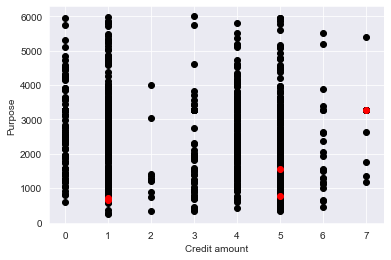

In [93]:
Centroids = (X1.sample(n=K1))
plt.scatter(X1["Purpose"],X1["Credit amount"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Credit amount"],c='red')
plt.xlabel('Credit amount')
plt.ylabel('Purpose')
plt.show()

In [94]:
diff = 1
j=0

In [95]:
while(diff!=0):
    XD=X1
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Credit amount"]-row_d["Credit amount"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X1[i]=ED
        i=i+1

    C=[]
    for index,row in X1.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K1):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X1["Cluster"]=C
    Centroids_new = X1.groupby(["Cluster"]).mean()[["Purpose","Credit amount"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Credit amount'] - Centroids['Credit amount']).sum()
        print(diff.sum())
    Centroids = X1.groupby(["Cluster"]).mean()[["Purpose","Credit amount"]]

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


382.6473675196982
375.0242727181682
344.15558569470636
190.22691317685806
183.53795337060973
146.3450309877285
152.85502616599894
207.6077067121697
192.04188215035938
176.12549416776525
153.61965548561776
177.0551816810138
162.44521975468356
168.93276612022783
156.0182188783475
805.022808165064
528.4643318854835
302.30035723818656
241.5026026220699
120.18058924307408
75.9030672361292
47.27648408078326
30.930212611931672
19.40600575036566
19.862726649564102
15.878431775431416
8.05460446774224
0.0


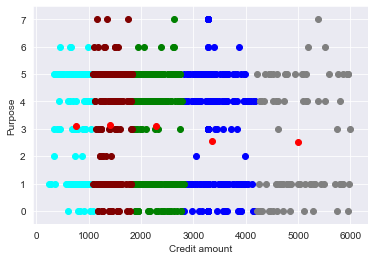

In [96]:
color=['blue','green','cyan','grey','maroon']
for k in range(K1):
    ds_1=X1[X1["Cluster"]==k+1]
    plt.scatter(ds_1["Credit amount"],ds_1["Purpose"],c=color[k])
plt.scatter(Centroids["Credit amount"],Centroids["Purpose"],c='red')
plt.xlabel('Credit amount')
plt.ylabel('Purpose')
plt.show()

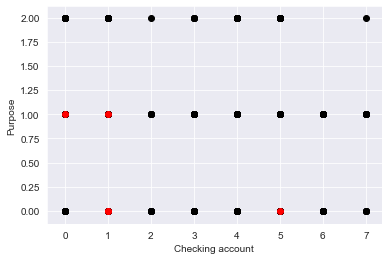

In [97]:
Centroids = (Y1.sample(n=K1))
plt.scatter(Y1["Purpose"],Y1["Checking account"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Checking account"],c='red')
plt.xlabel('Checking account')
plt.ylabel('Purpose')
plt.show()

In [98]:
diff = 1
j=0

In [99]:
while(diff!=0):
    XD=Y1
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Checking account"]-row_d["Checking account"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        Y1[i]=ED
        i=i+1

    C=[]
    for index,row in Y1.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K1):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    Y1["Cluster"]=C
    Centroids_new = Y1.groupby(["Cluster"]).mean()[["Purpose","Checking account"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Checking account'] - Centroids['Checking account']).sum()
        print(diff.sum())
    Centroids = Y1.groupby(["Cluster"]).mean()[["Purpose","Checking account"]]

-0.06565656565656586
-0.2686426788887333
-0.4227542304958971
0.0


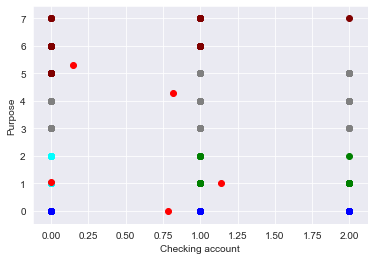

In [100]:
color=['blue','green','cyan','grey','maroon']
for k in range(K1):
    ds_1=Y1[Y1["Cluster"]==k+1]
    plt.scatter(ds_1["Checking account"],ds_1["Purpose"],c=color[k])
plt.scatter(Centroids["Checking account"],Centroids["Purpose"],c='red')
plt.xlabel('Checking account')
plt.ylabel('Purpose')
plt.show()

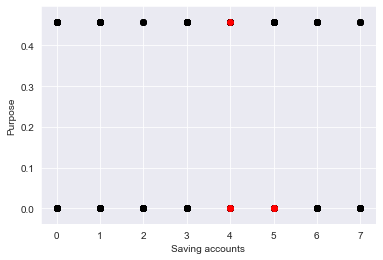

In [101]:
Centroids = (Z1.sample(n=K1))
plt.scatter(Z1["Purpose"],Z1["Saving accounts"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Saving accounts"],c='red')
plt.xlabel('Saving accounts')
plt.ylabel('Purpose')
plt.show()

In [102]:
diff = 1
j=0

In [103]:
while(diff!=0):
    XD=Z1
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Saving accounts"]-row_d["Saving accounts"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        Z1[i]=ED
        i=i+1

    C=[]
    for index,row in Z1.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K1):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    Z1["Cluster"]=C
    Centroids_new = Z1.groupby(["Cluster"]).mean()[["Purpose","Saving accounts"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Saving accounts'] - Centroids['Saving accounts']).sum()
        print(diff.sum())
    Centroids = Z1.groupby(["Cluster"]).mean()[["Purpose","Saving accounts"]]

-0.5928606130990731
0.1038331048518913
0.0


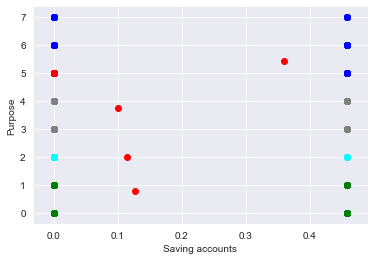

In [104]:
color=['blue','green','cyan','grey','maroon']
for k in range(K1):
    ds_1=Z1[Z1["Cluster"]==k+1]
    plt.scatter(ds_1["Saving accounts"],ds_1["Purpose"],c=color[k])
plt.scatter(Centroids["Saving accounts"],Centroids["Purpose"],c='red')
plt.xlabel('Saving accounts')
plt.ylabel('Purpose')
plt.show()

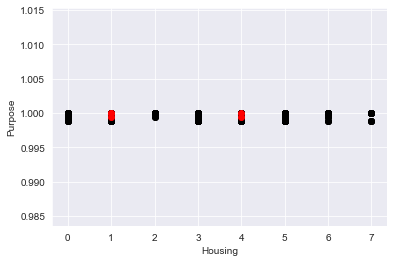

In [105]:
Centroids = (A1.sample(n=K1))
plt.scatter(A1["Purpose"],A1["Housing"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Housing"],c='red')
plt.xlabel('Housing')
plt.ylabel('Purpose')
plt.show()

In [106]:
diff = 1
j=0

In [107]:
while(diff!=0):
    XD=A1
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Housing"]-row_d["Housing"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        A1[i]=ED
        i=i+1

    C=[]
    for index,row in A1.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K1):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    A1["Cluster"]=C
    Centroids_new = A1.groupby(["Cluster"]).mean()[["Purpose","Housing"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Housing'] - Centroids['Housing']).sum()
        print(diff.sum())
    Centroids = A1.groupby(["Cluster"]).mean()[["Purpose","Housing"]]

-0.6707051026736774
-1.900865871872183
0.0


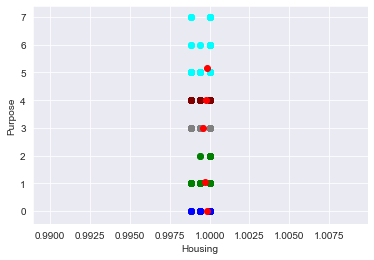

In [108]:
color=['blue','green','cyan','grey','maroon']
for k in range(K1):
    ds_1=A1[A1["Cluster"]==k+1]
    plt.scatter(ds_1["Housing"],ds_1["Purpose"],c=color[k])
plt.scatter(Centroids["Housing"],Centroids["Purpose"],c='red')
plt.xlabel('Housing')
plt.ylabel('Purpose')
plt.show()

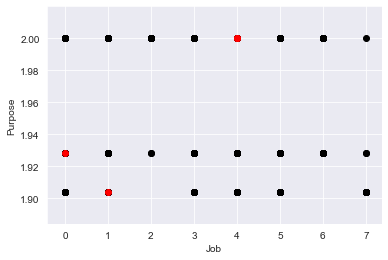

In [109]:
Centroids = (B1.sample(n=K1))
plt.scatter(B1["Purpose"],B1["Job"],c='black')
plt.scatter(Centroids["Purpose"],Centroids["Job"],c='red')
plt.xlabel('Job')
plt.ylabel('Purpose')
plt.show()

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

In [110]:
diff = 1
j=0

In [111]:
while(diff!=0):
    XD=B1
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Job"]-row_d["Job"])**2
            d2=(row_c["Purpose"]-row_d["Purpose"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        B1[i]=ED
        i=i+1

    C=[]
    for index,row in B1.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K1):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    B1["Cluster"]=C
    Centroids_new = B1.groupby(["Cluster"]).mean()[["Purpose","Job"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Purpose'] - Centroids['Purpose']).sum() + (Centroids_new['Job'] - Centroids['Job']).sum()
        print(diff.sum())
    Centroids = B1.groupby(["Cluster"]).mean()[["Purpose","Job"]]

0.6031128147715503
-0.7600795096497162
0.0


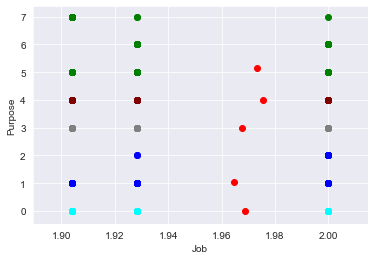

In [112]:
color=['blue','green','cyan','grey','maroon']
for k in range(K1):
    ds_1=B1[B1["Cluster"]==k+1]
    plt.scatter(ds_1["Job"],ds_1["Purpose"],c=color[k])
plt.scatter(Centroids["Job"],Centroids["Purpose"],c='red')
plt.xlabel('Job')
plt.ylabel('Purpose')
plt.show()